# Plotting

## [`matplotlib`](https://matplotlib.org/) is the most widely used scientific plotting library in Python.

- Commonly use a sub-library called [`matplotlib.pyplot`](https://matplotlib.org/stable/tutorials/introductory/pyplot.html).
- The Jupyter Notebook will render plots inline by default.

In [1]:
import matplotlib.pyplot as plt

Simple plots are then (fairly) simple to create.

In [ ]:
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')

## Plot data directly from a [`Pandas dataframe`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [2]:
# First, we load the data we want to work with, as before.

# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install sunpy drms cdflib zeep h5netcdf

from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.timeseries import TimeSeries

date_range = a.Time('2021/07/01', '2021/07/08')
dataset = a.cdaweb.Dataset('SOLO_L2_MAG-RTN-NORMAL-1-MINUTE')
result = Fido.search(date_range, dataset)

downloaded_files = Fido.fetch(result[0, 0:2])
solo_mag = TimeSeries(downloaded_files, concatenate=True)
solo_mag_data = solo_mag.to_dataframe()

/Users/pgm5/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Files Downloaded: 100%|████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.61file/s]


In [ ]:
solo_mag_data.plot()

In [ ]:
solo_mag_data.loc[:,'B_RTN_0':'B_RTN_2'].plot()

## Many styles of plot are available.

In [ ]:
plt.style.use('ggplot')
solo_mag_data.loc[:,'B_RTN_0':'B_RTN_2'].plot()
plt.ylabel('nT')

## Data can also be plotted by calling the `matplotlib plot` function directly.

- The command is `plt.plot(x, y)`
- The color and format of markers can also be specified as an additional optional argument e.g., `b-` is a blue line, `g--` is a green dashed line.

In [ ]:
epochs = solo_mag_data.T.columns
b_rtn_0 = solo_mag_data.loc[:,'B_RTN_0']

plt.plot(epochs, b_rtn_0, 'g--')

In [ ]:
epochs = solo_mag_data.T.columns
b_rtn_0 = solo_mag_data.loc[:,'B_RTN_0']
b_rtn_1 = solo_mag_data.loc[:,'B_RTN_1']

plt.plot(epochs, b_rtn_0, 'g--', label='B_RTN_0')
plt.plot(epochs, b_rtn_1, 'b-', label='B_RTN_1')

plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('nT')
plt.xticks(rotation=45)

In [ ]:
plt.scatter(b_rtn_0, b_rtn_1)

## Saving your plot to a file.

If you are satisfied with the plot you see you may want to save it to a file, perhaps to include it in a publication. There
is a function in the matplotlib.pyplot module that accomplishes this: [`savefig`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html).

In [ ]:
epochs = solo_mag_data.T.columns
b_rtn_0 = solo_mag_data.loc[:,'B_RTN_0']
b_rtn_1 = solo_mag_data.loc[:,'B_RTN_1']

plt.plot(epochs, b_rtn_0, 'g--', label='B_RTN_0')
plt.plot(epochs, b_rtn_1, 'b-', label='B_RTN_1')

plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('nT')
plt.xticks(rotation=45)

plt.savefig('my_figure.png')

The file format will automatically be deduced from the file name extension (other formats are pdf, ps, eps and svg).

Note that functions in `plt` refer to a global figure variable and after a figure has been displayed to the screen (e.g. with `plt.show()`) matplotlib will make this variable refer to a new empty Ugure. Therefore, make sure you call `plt.savefig()` before the plot is displayed to the screen, otherwise you may find a file with an empty plot.

When using dataframes, data is often generated and plotted to screen in one line. In addition to using `plt.savefig`, we can save a reference to the current figure in a local variable (with `plt.gcf(`)) and call the `savefig()` class method from that variable to save the figure to file.

In [ ]:
solo_mag_data.loc[:,'B_RTN_0':'B_RTN_2'].plot()
fig = plt.gcf() # get current figure
fig.savefig('my_figure.png')

## Making your plots accessible

Whenever you are generating plots to go into a paper or a presentation, there are a few things you can do to make sure that everyone can understand your plots.
- Always make sure your text is large enough to read. Use the `fontsize` parameter in `xlabel`, `ylabel`, `title`, and `legend`, and [`tick_params` with `labelsize`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html) to increase the text size of the numbers on your axes.
- Similarly, you should make your graph elements easy to see. Use `s` to increase the size of your scatterplot markers and `linewidth` to increase the sizes of your plot lines.
- Using color (and nothing else) to distinguish between different plot elements will make your plots unreadable to anyone who is colorblind, or who happens to have a black-and-white office printer. For lines, the `linestyle` parameter lets you use different types of lines. For scatterplots, `marker` lets you change the shape of your points. If you’re unsure about your colors, you can use [Coblis](https://www.color-blindness.com/coblis-color-blindness-simulator/) or [Color Oracle](https://colororacle.org/) to simulate what your plots would look like to those with colorblindness.

## Key Points

- **[`matplotlib`](https://matplotlib.org/) is the most widely used scientific plotting library in Python.**
- **Plot data directly from a Pandas dataframe.**
- **Select and transform data, then plot it.**
- **Many styles of plot are available: see the [Python Graph Gallery](https://python-graph-gallery.com/matplotlib/) for more options.**
- **Can plot many sets of data together.**

## Bonus: XKCD-style plots

  Preparing metadata (setup.py) ... done
  Created wheel for xkcd: filename=xkcd-2.4.2-py3-none-any.whl size=9179 sha256=c1efee9aeaa07294a74f17dbb8dec0c96063b00215791a09a53e352423908d97
  Stored in directory: /Users/pgm5/Library/Caches/pip/wheels/4d/24/73/6b02a683a27665b4444c7f3b6de872e11c07e48c6e3fb2dc7b
Successfully built xkcd


Text(0, 0.5, 'nT')

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd' not found.


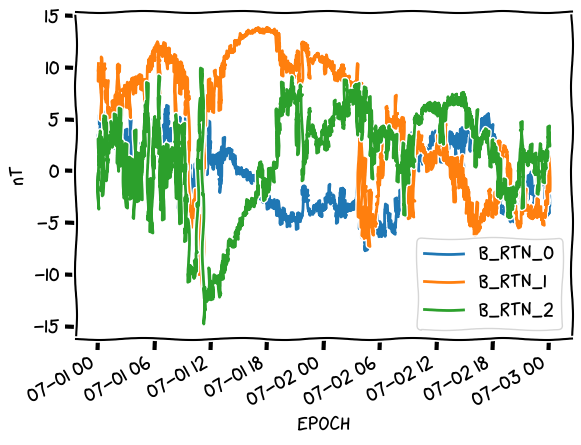

In [5]:
import sys
!{sys.executable} -m pip install xkcd

plt.xkcd()
solo_mag_data.loc[:,'B_RTN_0':'B_RTN_2'].plot()
plt.ylabel('nT')